In [1]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from datetime import timedelta

In [2]:
eeg_recording = pd.read_csv('../Sleep Data/raw_data_1/101/PSG_raw/C3.txt', sep=' ', skiprows=7, header=None)
eeg_recording.columns = ['data']

In [3]:
eeg_numpy = np.array(eeg_recording['data'])

In [4]:
sleep_profile = pd.read_csv('../Sleep Data/raw_data_1/101/PSG_analysis_manual/Sleep profile.txt', sep=";", skiprows=7, header=None)
sleep_profile.columns = ["time", "stage"]

In [5]:
sleep_profile_numpy = np.array(sleep_profile['stage'])

In [6]:
sleep_profile_numpy = sleep_profile_numpy[:-1]

In [7]:
eeg_numpy = eeg_numpy[:-128]

In [19]:
eeg_numpy = np.log(eeg_numpy + 1 - min(eeg_numpy))

In [20]:
min(eeg_numpy)

0.0

In [21]:
data = np.array(np.split(eeg_numpy, len(eeg_numpy)/(128*30)))

In [22]:
np.place(sleep_profile_numpy, sleep_profile_numpy==' Wake', [0])
np.place(sleep_profile_numpy, sleep_profile_numpy==' N1', [1])
np.place(sleep_profile_numpy, sleep_profile_numpy==' N2', [2])
np.place(sleep_profile_numpy, sleep_profile_numpy==' N3', [3])
np.place(sleep_profile_numpy, sleep_profile_numpy==' REM', [4])
np.place(sleep_profile_numpy, sleep_profile_numpy==' A', [5])
np.place(sleep_profile_numpy, sleep_profile_numpy==' Artefact', [5])

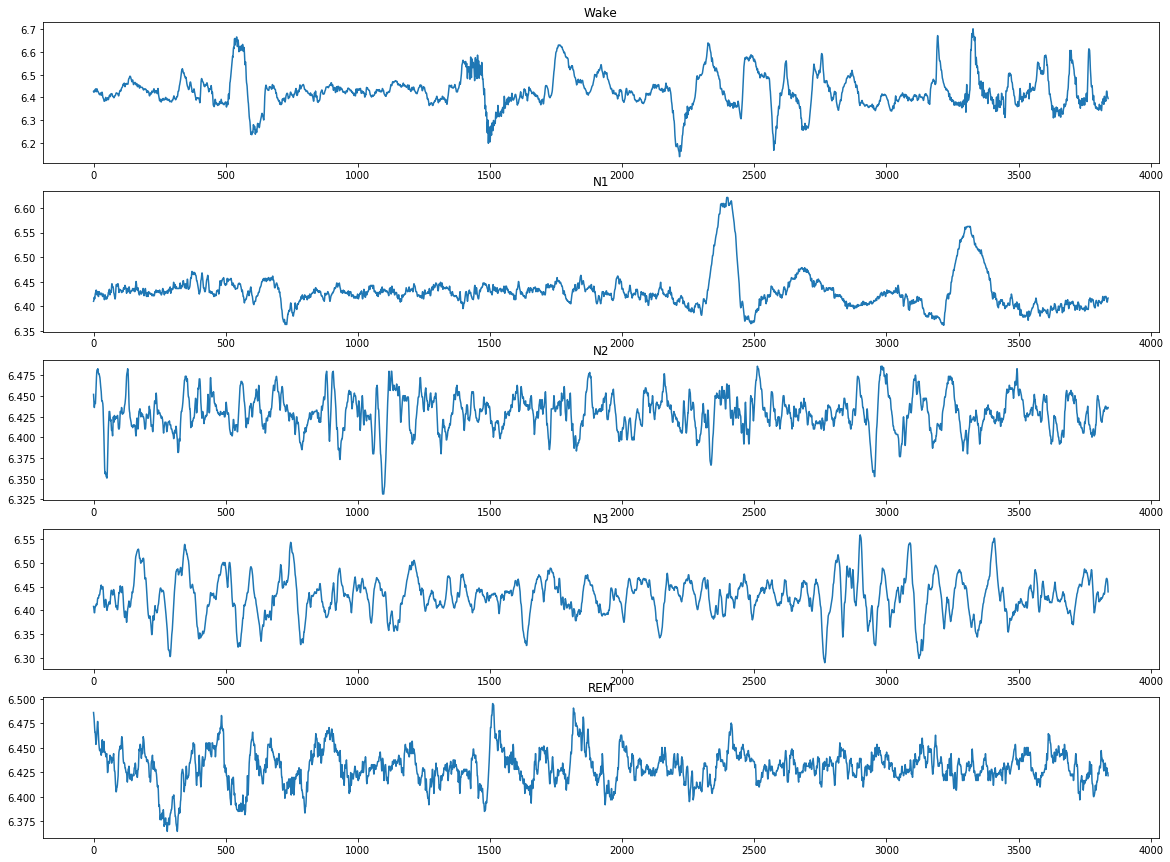

<Figure size 1440x432 with 0 Axes>

In [40]:
# plt.plot(eeg_numpy[128*30*31:128*30*32])
# plt.show

fig, axes = plt.subplots(5, 1, figsize=(20, 15))
plt.figure(figsize=(20, 6))
counts = [0,0,0,0,0]

n = 10
y_min = -200
y_max = 200

for i in range(0, len(data)):
    if sleep_profile_numpy[i] == 0:
        counts[0] += 1
        if counts[0] == n:
#             axes[0].set_ylim(y_min,y_max)
            axes[0].plot(data[i])
            axes[0].set_title("Wake")
        
        
    elif sleep_profile_numpy[i] == 1:
        counts[1] += 1
        if counts[1] == n:            
#             axes[1].set_ylim(y_min,y_max)
            axes[1].plot(data[i])
            axes[1].set_title("N1")
        
        
    elif sleep_profile_numpy[i] == 2:
        counts[2] += 1
        if counts[2] == n:            
#             axes[2].set_ylim(y_min,y_max)
            axes[2].plot(data[i])
            axes[2].set_title("N2")
         
        
    elif sleep_profile_numpy[i] == 3:
        counts[3] += 1
        if counts[3] == n:            
#             axes[3].set_ylim(y_min,y_max)
            axes[3].plot(data[i])
            axes[3].set_title("N3")
        
    elif sleep_profile_numpy[i] == 4:
        counts[4] += 1
        if counts[4] == n:
#             axes[4].set_ylim(y_min,y_max)
            axes[4].plot(data[i])
            axes[4].set_title("REM")
         

In [132]:
np.place(sleep_profile_numpy, sleep_profile_numpy==' Wake', [0])
np.place(sleep_profile_numpy, sleep_profile_numpy==' N1', [1])
np.place(sleep_profile_numpy, sleep_profile_numpy==' N2', [1])
np.place(sleep_profile_numpy, sleep_profile_numpy==' N3', [1])
np.place(sleep_profile_numpy, sleep_profile_numpy==' REM', [1])
np.place(sleep_profile_numpy, sleep_profile_numpy==' A', [0])
np.place(sleep_profile_numpy, sleep_profile_numpy==' Artefact', [0])

In [10]:
sleep_profile_numpy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [41]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras import Input

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_data, test_data, train_labels, test_labels = train_test_split(data, sleep_profile_numpy, test_size=0.1, random_state=42)

In [26]:
# Embedding
max_features = 3000
maxlen = 3840
embedding_size = 128

# Convolution
kernel_size = 16
filters = 128
pool_size = 4

# LSTM
lstm_output_size = 30

# Training
batch_size = 40
epochs = 15

In [31]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=2))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(5, activation='relu'))
model.add(Activation('softmax'))

In [49]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(test_data, test_labels))

Train on 738 samples, validate on 82 samples
Epoch 1/15
738/738 [==============================] - 1s 1ms/sample - loss: 27.0613 - acc: 0.2466 - val_loss: 6.5535 - val_acc: 0.2683
Epoch 2/15
738/738 [==============================] - 1s 853us/sample - loss: 2.8899 - acc: 0.2683 - val_loss: 1.9704 - val_acc: 0.3293
Epoch 3/15
738/738 [==============================] - 1s 858us/sample - loss: 1.6448 - acc: 0.2900 - val_loss: 1.4572 - val_acc: 0.3293
Epoch 4/15
738/738 [==============================] - 1s 994us/sample - loss: 1.5152 - acc: 0.2900 - val_loss: 1.4651 - val_acc: 0.2561
Epoch 5/15
738/738 [==============================] - 1s 1ms/sample - loss: 1.4832 - acc: 0.3211 - val_loss: 1.4971 - val_acc: 0.2561
Epoch 6/15
738/738 [==============================] - 1s 830us/sample - loss: 1.4675 - acc: 0.3103 - val_loss: 1.4659 - val_acc: 0.2683
Epoch 7/15
738/738 [==============================] - 1s 822us/sample - loss: 1.4830 - acc: 0.3008 - val_loss: 1.5534 - val_acc: 0.2561
Epoch 

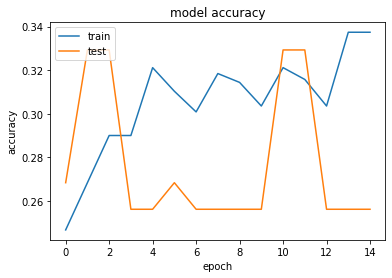

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

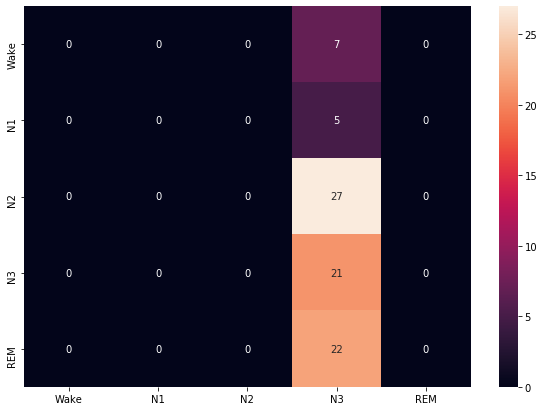

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = model.predict(test_data)

test_labels = test_labels.astype('int32')

confusion_matrix = confusion_matrix(test_labels, y_pred.argmax(axis=1))

df_cm = pd.DataFrame(confusion_matrix, index = ['Wake', 'N1', 'N2', 'N3', 'REM'],
                  columns = ['Wake', 'N1', 'N2', 'N3', 'REM'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [54]:
test_labels

array([2, 4, 2, 4, 2, 2, 2, 3, 2, 1, 3, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3,
       2, 4, 1, 3, 2, 0, 4, 2, 4, 1, 2, 3, 4, 1, 2, 2, 4, 3, 0, 3, 2, 0,
       3, 3, 2, 1, 2, 4, 3, 2, 4, 4, 3, 0, 2, 2, 2, 2, 0, 4, 4, 2, 3, 3,
       4, 3, 4, 4, 3, 2, 4, 3, 2, 0, 4, 4, 0, 3, 4, 3], dtype=int32)